<a href="https://colab.research.google.com/github/menouarazib/llm/blob/main/Kaggle_PyGemma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyGemma

`PyGemma` is an AI Assistant project, constructed using the [Gemma model](https://www.kaggle.com/models/google/gemma/). It is designed to assist Kaggle developers by providing answers to common questions about the Python programming language. This makes `PyGemma` an invaluable resource for developers seeking Python-related assistance on Kaggle.

In this notebook, we will guide you through the process of creating such an AI Assistant. Our approach involves fine-tuning the Gemma model on a publicly available dataset of Python code instructions. Here are the major steps involved:

1.   **Set up the Development Environment**: Prepare the necessary software and libraries for the project.
2.   **Load and Prepare the Dataset**: Import the dataset and preprocess it for the model.
3.   **Load the Gemma Model**: Initialize the Gemma model for fine-tuning.
4.   **Fine-tune Gemma**: Adjust the Gemma model parameters using our dataset to specialize it for Python-related queries.
5.   **Test and Evaluate the Fine-tuned Model**: Assess the performance of the fine-tuned model and make necessary adjustments.
6.   **Develop a User-friendly UI**: Create an intuitive user interface that allows users to interact with `PyGemma`.

By following these steps, you can create a powerful AI Assistant capable of answering Python-related questions.

## **1.   Set up the Development Environment**

### 1.1 Installing PyTorch

This section covers the installation of PyTorch, a key library that will be used in this project. PyTorch is an open-source machine learning library for Python, and it’s essential for tasks such as loading the Gemma model and fine-tuning it.

In [ ]:
# Checks if PyTorch is installed and installs it if not.
try:
    import torch
    print("PyTorch is installed!")
except ImportError:
    print("PyTorch is not installed.")
    !pip install -q torch


PyTorch is installed!


### 1.2 Installing Libraries for Dataset Loading, Gemma Model Initialization, and Fine-tuning

This section involves the installation of necessary libraries that will be used for loading the dataset, initializing the Gemma model, and fine-tuning it.

In [ ]:
!pip install -q --upgrade "transformers==4.38.2"
!pip install -q --upgrade "datasets==2.16.1"
!pip install -q --upgrade "accelerate==0.26.1"
!pip install -q --upgrade "evaluate==0.4.1"
!pip install -q --upgrade "bitsandbytes==0.42.0"
!pip install -q --upgrade "trl==0.7.11"
!pip install -q --upgrade "peft==0.8.2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━

### 1.3 Installing Flash Attention

This section guides you through the process of installing `FlashAttention`.

`FlashAttention` is an efficient and precise `Transformer model` acceleration technique. It's a fast and memory-efficient algorithm for exact attention that allows for the processing of longer sequences in Transformer models. This leads to faster training.

FlashAttention achieves a running speed `2–4` times faster than the standard Attention implemented in `PyTorch`, requiring only `5%-20%` of the memory. It uses tiling to reduce the number of memory reads/writes between GPU high bandwidth memory (`HBM`) and GPU on-chip `SRAM`.

Learn more at [FlashAttention](https://github.com/Dao-AILab/flash-attention/tree/main). Installing flash attention from source can take quite a bit of time (`~ minutes`).

In [ ]:
import torch

cuda_new_architecture = False

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available.")
    cuda_new_architecture = torch.cuda.get_device_capability()[0] >= 8
    if not cuda_new_architecture:
      print('Hardware not supported for Flash Attention')
else:
    print("CUDA is not available.")

# If you are using a GPU with Ampere architecture (e.g. NVIDIA A10G or RTX 4090/3090) or newer you can use Flash attention.
if cuda_new_architecture:
  !pip install ninja packaging
  # If your machine has less than 96GB of RAM and lots of CPU cores, ninja might run too many parallel compilation jobs that could exhaust the amount of RAM.
  # To limit the number of parallel compilation jobs, you can set the environment variable MAX_JOBS:
  !MAX_JOBS=4 pip install -q flash-attn --no-build-isolation --upgrade

CUDA is available.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.6 MB/s eta 0:00:00


### 1.4 Installing tensorboard to report the metrics

In [ ]:
!pip install -q tensorboard

## **2.   Loading and Preparing the Dataset**

### 2.1 Loading The Dataset

The dataset we will use for fine-tuning Gemma is [Vezora/Tested-22k-Python-Alpaca](https://huggingface.co/datasets/Vezora/Tested-143k-Python-Alpaca). This dataset comprises Python code snippets paired with their corresponding instruction descriptions. It’s an ideal resource for training our AI assistant to understand and respond to Python-related queries.

In [ ]:
from datasets import load_dataset

data_set_path = "Vezora/Tested-143k-Python-Alpaca"
data_set_path_url = "https://huggingface.co/datasets/Vezora/Tested-143k-Python-Alpaca"

# Load the dataset from the Hugging Face Hub
dataset = load_dataset(data_set_path, split="train")
dataset = dataset.shuffle(seed=42)

Generating train split: 0 examples [00:00, ? examples/s]

### 2.2 Formatting the Dataset

As we aim to create an AI Assistant, it's necessary to format our training data into conversations. The conversational format supported by the [SFTTrainer](https://huggingface.co/docs/trl/v0.7.11/en/sft_trainer#trl.SFTTrainer) is as follows:

- Conversational Format

```python
{"messages": [{"role": "system", "content": "Welcome to PyGemma, .."},

{"role": "user", "content": "Create a function to calculate the sum of a sequence of integers"},

{"role": "assistant", "content": "..."}, ...]}
```

In this format, each conversation is represented as a dictionary with a key `messages` that maps to a list of message dictionaries. Each message dictionary has a `role` (which can be 'system', 'user', or 'assistant') and `content` (which contains the actual content of the message). This format allows the model to understand the flow of the conversation and learn to generate appropriate responses.

The dataset contains three columns: ‘instruction’, ‘input’, and ‘output’. The ‘input’ column is empty, so we only need to use the ‘instruction’ and ‘output’ columns.

In [ ]:
# Convert dataset to Conversational messages

system_message = """Welcome to PyGemma, your AI-powered Python assistant. I'm here to help you answer common questions about the Python programming language. Let's dive into Python!"""

def create_conversation(sample):
    # Return the conversation formatted as a dictionary
    return {
        "messages": [
            {"role": "system", "content": system_message},
            {"role": "user", "content": sample["instruction"]},
            {"role": "assistant", "content": sample["output"]}
        ]
    }

dataset = dataset.map(create_conversation, remove_columns=dataset.features, batched=False)

Map:   0%|          | 0/143327 [00:00<?, ? examples/s]

## **3. Load the Gemma Model**

To load the Gemma model from the Hugging Face's Hub, we first need to select the specific version of Gemma we wish to use. Following this, we apply quantization and FlashAttention. These techniques can significantly reduce the memory footprint of the model, making it more efficient for our purposes.

### 3.1 Login to Hugging Face's Hub

In [ ]:
# Install huggingface_hub
!pip install -q huggingface_hub

from huggingface_hub import login

login(
        token='****',
        add_to_git_credential=True
)


Token is valid (permission: write).
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


### 3.2 Load google/gemma-2b


This process involves two key steps:

1. **Gemma Quantization:**
    - We first load gemma-2b model (LLM).
    - We then use the `bitsandbytes` library to quantize the model, which can significantly reduce its memory footprint.

> **Note:** The memory requirements of the model scale with its size. For instance, a 7B parameter model may require
a 24GB GPU for fine-tuning.

2. **Chat Model Preparation:**
    - To train a gemma-2b for chat/conversational tasks, we need to prepare both the model and its tokenizer.
    
    - This involves adding special tokens to the tokenizer and the model itself. These tokens help the model understand the different roles within a conversation.
    
    - The **trl** library provides a convenient method called `setup_chat_format` for this purpose. This method performs the
    following actions:
    
        * Adds special tokens to the tokenizer, such as `<|im_start|>` and `<|im_end|>`, to mark the beginning and
        ending of a conversation.
        
        * Resizes the model's embedding layer to accommodate the new tokens.
        
        * Sets the tokenizer's chat template, which defines the format used to convert input data into a chat-like
        structure. The default template is `chatml` from OpenAI.


> **Note:** For `google/gemma`, we will not use `setup_chat_format`. Instead, we will directly use this tokenizer, [philschmid/gemma-tokenizer-chatml](https://huggingface.co/philschmid/gemma-tokenizer-chatml), to fine-tune `google/gemma` with ChatML.

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig


model_id = "google/gemma-2b"
model_url = "https://huggingface.co/google/gemma-2b"

# BitsAndBytesConfig
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True, bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype=torch.bfloat16
)

attn_implementation = None
if cuda_new_architecture:
  attn_implementation='flash_attention_2'

# Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",
    trust_remote_code=True,
    attn_implementation=attn_implementation,
    torch_dtype=torch.bfloat16,
    quantization_config=bnb_config
)

tokenizer = AutoTokenizer.from_pretrained("philschmid/gemma-tokenizer-chatml")
tokenizer.padding_side = "right"

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

## **4. Fine-tune gemma-2b**

We are now ready to fine-tune `gemma-2b`. We will use the `SFTTrainer` from `trl` to fine-tune our model. The `SFTTrainer` makes it straightfoward to supervise fine-tune open LLMs. The `SFTTrainer` is a subclass of the `Trainer` from the `transformers` library and supports all the same features, including logging, evaluation, and checkpointing, but adds additiional quality of life features, including:

- Training on completions only, ignoring prompts
- Packing datasets for more efficient training
- PEFT (parameter-efficient fine-tuning) support including `LoRA`

We will use the `packing` and `PEFT` features in our fine-tuning. As peft method we will use `LoRA` (Low-Rank Adaptation), a technique to reduce the memory footprint of large language models during fine-tuning. `LoRA` achieves this without sacrificing performance by training low-rank adapters (two matrices `A` and `B`) while freezing the weights of the base model. If you want to learn more about `LoRA` and how it works, check out [Making LLMs even more accessible with bitsandbytes, 4-bit quantization and `LoRA` blog post](https://huggingface.co/blog/4bit-transformers-bitsandbytes).

### 4.1 Setting LoRA Config

To use `LoRA` with `SFTTrainer` we just need only to create the `LoraConfig` and pass it to the `SFTTrainer`.

In [ ]:
from peft import LoraConfig

peft_config = LoraConfig(
    lora_alpha=8,                # The alpha parameter for LoRA scaling.
    lora_dropout=0.05,           # The dropout probability for LoRA layers.
    r=6,                         # Lora attention dimension (the "rank").
    bias="none",                 # Bias type for LoRA layers.
    target_modules="all-linear", # The names of the modules to apply the adapter to.
    task_type="CAUSAL_LM"
)

### 4.2 Setting the TrainingArguments

Before we can start our training we need to define the hyperparameters (`TrainingArguments`) we want to use.

In [ ]:
from transformers import TrainingArguments

output_dir_peft = "peft-lora-model"

# Whether to run evaluation on the validation set or not.
evaluate = False
if evaluate:
  evaluation_strategy="steps"
  per_device_eval_batch_size = 4
else:
  evaluation_strategy = "no"
  per_device_eval_batch_size = None

"""
Whether to enable bf16 16-bit (mixed) precision training or not. By choosing bf16 over the traditional 32-bit training,
we can enhance memory efficiency.  It’s important to note that in mixed precision training, certain parts of the model,
like variables and some computations, are kept in float32 for numeric stability, while others are in float16.
"""
bf16 = False
if cuda_new_architecture:
  bf16 = True

args = TrainingArguments(
    output_dir=output_dir_peft,                                   # The output directory where the model and checkpoints will be saved.
    num_train_epochs=3,                                           # Number of training epochs
    per_device_train_batch_size=2,                                # Batch size per device during training.
    per_device_eval_batch_size=per_device_eval_batch_size,        # Batch size per device during evaluation.
    gradient_accumulation_steps=4,                                # Number of updates steps to accumulate the gradients for, before performing a backward/update pass.
    gradient_checkpointing=True,                                  # Use gradient checkpointing to save memory at the expense of slower backward pass.
    gradient_checkpointing_kwargs={'use_reentrant': False},
    optim="adamw_torch_fused",                                    # The optimizer to use: 'adamw_hf', 'adamw_torch', 'adamw_torch_fused', 'adamw_apex_fused', 'adamw_anyprecision' or 'adafactor'.
    logging_steps=10,                                             # Number of update steps between two logs.
    save_strategy='epoch',                                        # The checkpoint save strategy to adopt during training.
    learning_rate=2e-05,                                          # The initial learning rate for AdamW.
    bf16=bf16,                                                    # Whether to use bf16 16-bit (mixed) precision training instead of 32-bit training. Requires Ampere or higher
                                                                  # NVIDIA architecture or using CPU (use_cpu) or Ascend NPU. This is an experimental API and it may change.
    max_grad_norm=0.3,                                            # Maximum gradient norm (for gradient clipping).
    warmup_ratio=0.1,                                             # Ratio of total training steps used for a linear warmup from 0 to learning_rate.
    lr_scheduler_type='cosine',                                   # The learning rate scheduler type to use.
    report_to='tensorboard',
    max_steps=-1,                                                 # Total number of training steps to perform. If set to a positive number it overrides 'num_train_epochs'.
    seed=42,                                                      # Random seed that will be set at the beginning of training. To ensure reproducibility across runs.
    overwrite_output_dir=True,                                    # Overwrite the content of the output directory.
    evaluation_strategy=evaluation_strategy                       # The evaluation strategy to adopt during training.
  )

### 4.3 Setting the Supervised Finetuning Trainer (`SFTTrainer`)
    
We now have every building block to create our `SFTTrainer` and start training our model.    

In [ ]:
from trl import SFTTrainer

if evaluate:
  # Split dataset into training samples and test samples
  dataset = dataset.train_test_split(test_size=0.20)
  train_dataset=dataset["train"]
  eval_dataset=dataset["test"]
else:
  train_dataset=dataset
  eval_dataset=None

max_seq_length = 3072 # The maximum sequence length to use

trainer = SFTTrainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    peft_config=peft_config,
    max_seq_length=max_seq_length,
    tokenizer=tokenizer,
    packing=True,
    dataset_kwargs={'add_special_tokens': False, 'append_concat_token': False}
)

Generating train split: 0 examples [00:00, ? examples/s]

### 4.4 Starting Training and Saving Model

We start training the model by calling the `train()` method on the trainer instance. This will start the training
loop and train the model for `3 epochs`. The model will be automatically saved to the output directory.

In [ ]:
model.config.use_cache = False

# Start training
trainer.train()

# Save the PEFT_LoRA model
trainer.save_model()

The input hidden states seems to be silently casted in float32, this might be related to the fact you have upcasted embedding or layer norm layers in float32. We will cast back the input in torch.bfloat16.


Step,Training Loss
10,1.382700
20,1.360700
30,1.412800
40,1.430900
50,1.448500
60,1.394700
70,1.384000
80,1.435000
90,1.437700
100,1.413200


### 4.4 Merging `LoRA` Adapters with the Base Model

While utilizing `LoRA`, we focus on training the adapters rather than the entire model. Consequently, during the model saving process, only the `adapter weights : A, B` are preserved, not the complete model. We wish to save the entire model for easier usage with inference. To do so, we can incorporate the adapter weights into the model weights. This can be achieved using the `merge_and_unload` method. Following this, the model can be saved using the
`save_pretrained` method. The result is a default model that is ready for inference.

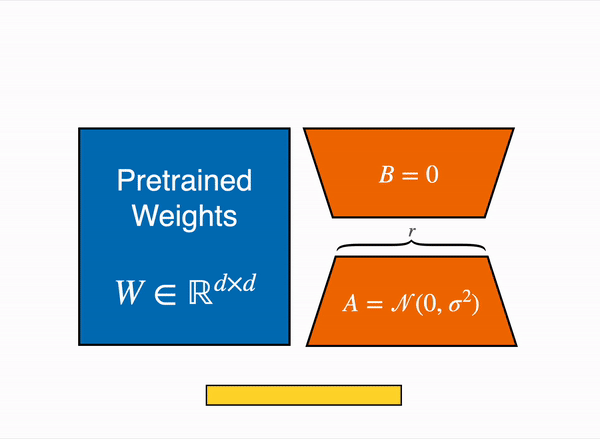

Credit: [LoRA: Low-Rank Adaptation of Large Language Model](https://arxiv.org/abs/2106.09685)

In [ ]:
# Free the GPU memory
del model
del trainer
torch.cuda.empty_cache()

In [ ]:
import torch
from peft import AutoPeftModelForCausalLM

# Load Peft model on CPU
model = AutoPeftModelForCausalLM.from_pretrained(
    output_dir_peft,
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True
)

output_dir = "pygemma-2b"
# Merge LoRA with the base model and save
merged_model = model.merge_and_unload()

merged_model.save_pretrained(output_dir, safe_serialization=True, max_shard_size="2GB")
tokenizer.save_pretrained(output_dir)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

('pygemma-2b/tokenizer_config.json',
 'pygemma-2b/special_tokens_map.json',
 'pygemma-2b/tokenizer.json')

### Copy all result folders from 'temp_gemma-2b-chat' to 'gemma-2b-chat'

In [ ]:
import os
import shutil

source_folder = output_dir_peft
destination_folder = output_dir
os.makedirs(destination_folder, exist_ok=True)
for item in os.listdir(source_folder):
    item_path = os.path.join(source_folder, item)
    if os.path.isdir(item_path):
        destination_path = os.path.join(destination_folder, item)
        shutil.copytree(item_path, destination_path)


### Generating a model card (README.md)

In [ ]:
card = f'''
---
license: apache-2.0
tags:
- generated_from_trainer
- google/gemma
- PyTorch
- transformers
- trl
- peft
- tensorboard
model-index:
- name: {output_dir}
  results: []
datasets:
- {data_set_path}
language:
- en
base_model: google/gemma-2b
widget:
  - example_title: Compute Sum
    messages:
      - role: system
        content: {system_message}
      - role: user
        content: Create a function to calculate the sum of a sequence of integers.
pipeline_tag: text-generation
---

# Model Card for {output_dir}:

🐍💬🤖


**{output_dir}** is a language model that is trained to act as Python assistant. It is a finetuned version of [{model_id}]({model_url}) that was trained using `SFTTrainer` on publicly available dataset
[{data_set_path}]({data_set_path_url}).


## Training Metrics

[The training metrics can be found on **TensorBoard**](https://huggingface.co/Menouar/{output_dir}/tensorboard).


## Training hyperparameters

The following hyperparameters were used during the training:


'''

with open(f"{output_dir}/README.md", "w") as f:
    f.write(card)

args_dict = vars(args)

with open(f"{output_dir}/README.md", "a") as f:
    for k, v in args_dict.items():
        f.write(f"- {k}: {v}")
        f.write("\n \n")


## Pushing 'gemma-2b-chat' to the Hugging Face account.

In [ ]:

from huggingface_hub import HfApi, HfFolder, Repository

# Instantiate the HfApi class
api = HfApi()

# Our Hugging Face repository
repo_name = output_dir

# Create a repository on the Hugging Face Hub
repo = api.create_repo(token=HfFolder.get_token(), repo_type="model", repo_id=repo_name)

api.upload_folder(
    folder_path=output_dir,
    repo_id=repo.repo_id
)


In [ ]:
from google.colab import runtime
runtime.unassign()